<a href="https://colab.research.google.com/github/SBMagar/Covid-19_Prediction/blob/main/Covid_19_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I am using  a sigmoidal function to fit the historical data of Covid-19 and predict or forecast. And also use LinearRegression and RandomForestRegressor to predict.
I thought of a sigmoidal function first because China's data resembled a sigmoidal shape. Therefore, I try to fit sigmoid functions onto Nepal also.


**Step-1: Load Dataset from s3 Bucket: (downloaded from https://covid.ourworldindata.org/data/owid-covid-data.csv)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df1=pd.read_csv('s3://sagemaker-studio-im065hy7nj/owid-covid-data.csv')

In [ ]:
# df1.head(5)


In [ ]:
df1.columns

**Step-2: Subsetting only those rows that have "NPL" in the "location" column and plot y-axis total_cases over x-axis as day-count.**

In [ ]:
Nepal_df = df1[df1['location']=='Nepal'].groupby('date')[['total_cases','total_deaths']].sum()
Nepal_df['day_count'] = list(range(1,len(Nepal_df)+1))
ydata = Nepal_df.total_cases
xdata = Nepal_df.day_count
Nepal_df['rate'] = (Nepal_df.total_cases-Nepal_df.total_cases.shift(1))/Nepal_df.total_cases
Nepal_df['increase'] = (Nepal_df.total_cases-Nepal_df.total_cases.shift(1))
# Nepal_df = Nepal_df[Nepal_df.total_cases>100]

plt.plot(xdata, ydata, 'o')
plt.title("Nepal")
plt.ylabel("Population Infected")
plt.xlabel("Days")
plt.show()

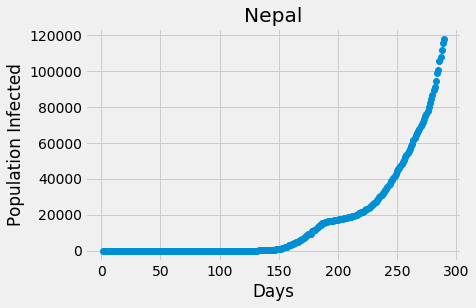

**Step-3: Sigmoidal Function:**

In [ ]:
from scipy.optimize import curve_fit
import pylab


def sigmoid(x,c,a,b):
     y = c*1 / (1 + np.exp(-a*(x-b)))
     return y

xdata = np.array([1, 2, 3,4, 5, 6, 7])
ydata = np.array([0, 0, 13, 35, 75, 89, 91])

popt, pcov = curve_fit(sigmoid, xdata, ydata, method='dogbox',bounds=([0.,0., 0.],[100,2, 10.]))
print(popt)

x = np.linspace(-1, 10, 50)
y = sigmoid(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(-0.05, 105)
pylab.legend(loc='best')
pylab.show()

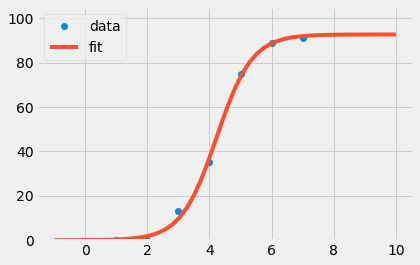

Sigmoid function,
Here is a snap of how I learnt to fit Sigmoid Function - y = c/(1+np.exp(-a*(x-b))) and 3 coefficients [c, a, b]:

* c - the maximum value (eventual maximum infected people, the sigmoid scales to this value eventually)
* a - the sigmoidal shape (how the infection progress. The smaller, the softer the sigmoidal shape is)
* b - the point where sigmoid start to flatten from steepening (the midpoint of sigmoid, when the rate of increase start to slow down)

**Step-4: Since our dataset doesn't have recovered cases column so I am gonna import and read next dataset**

In [ ]:
df2 = pd.read_csv('s3://sagemaker-studio-im065hy7nj/time_series_covid19_recovered_global.csv')

In [ ]:
# Extract list of values of 'recovered' column and insert that column to our first data-subset with proper arrangement. 
# Since few pairs of row doesn't exist in column of new dataset, so we gonna manually add values referencing other sites.
list(df2.iloc[172, 4:])
input_values = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 4, 4, 7, 10, 11, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 22, 22, 31, 31, 31, 33, 33, 35, 35, 36, 36, 36, 36, 37, 45, 49, 70, 70, 87, 112, 155, 183, 187, 206, 219, 220, 221, 266, 278, 290, 333, 365, 467, 488, 584, 674, 861, 877, 913, 974, 1041, 1158, 1167, 1186, 1402, 1578, 1772, 2148, 2224, 2338, 2650, 2698, 2834, 3013, 3134, 3194, 4656, 5320, 6143, 6415, 6547, 6811, 7499, 7752, 7891, 8011, 8442, 8589, 10294, 10328, 11025, 11249, 11534, 11637, 11695, 11868, 12477, 12684, 12840, 12947, 13053, 13128, 13754, 13875, 14021, 14248, 14399, 14492, 14603, 14961, 15026, 15156, 15389, 15814, 16313, 16353, 16493, 16664, 16728, 16837, 17077, 17201, 17335, 17495, 17580, 17700, 17964, 18214, 18350, 18631, 18806, 19119, 19504, 20073, 20242, 20555, 20822, 21410, 22178, 23290, 24207, 25561, 27127, 28941, 30677, 32964, 33882, 35700, 36672, 37524, 38697, 39576, 40638, 41706, 42949, 43820, 45267, 46233, 47238, 48061, 49954, 50411, 51866, 53013, 53898, 54640, 55371, 56428, 57389, 60696, 62740, 64069, 65202, 67542, 68668, 71343, 73023, 74252, 75804, 77277, 78780, 80954]
len(input_values)

**step-5: Creating new subset with required columns and rows only:**

In [ ]:
in_df1 = df1[df1['location']=='Nepal'].groupby('date')[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_tests']].sum().reset_index(False)
in_df1['recovered']= np.array(input_values).copy()
in_df1['Active']=in_df1['total_cases']-in_df1['new_deaths']-in_df1['recovered']
# in_df1 = in_df1[in_df1.Active>=20]

In [ ]:
in_df1.head(10)

In [ ]:
in_df1.isnull().sum()

**Step-6: Sigmoidal fitting**

In [ ]:
in_df1['day_count'] = list(range(1, len(in_df1)+1))
in_df1['increase'] = (in_df1.total_cases-in_df1.total_cases.shift(1))
in_df1['rate'] = (in_df1.total_cases-in_df1.total_cases.shift(1))/in_df1.total_cases


def sigmoid(x,c,a,b):
     y = c*1 / (1 + np.exp(-a*(x-b)))
     return y

xdata = np.array(list(in_df1.day_count)[::2])
ydata = np.array(list(in_df1.total_cases)[::2])

# population=29136808
# popt, pcov = curve_fit(sigmoid, xdata, ydata, method='dogbox',bounds=([0., 0., 0.], [population, 6, 180.]))
# print(popt)

**Step-7: Prediction Using Mannual sigmoidal fitting:**

In [ ]:
import pylab

est_a = 145000
est_b = 0.04
est_c = 270
x = np.linspace(-1, Nepal_df.day_count.max()+50, 50)
y = sigmoid(x,est_a,est_b,est_c)
pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit',alpha = 0.8)
pylab.ylim(-0.05, est_a*1.05)
pylab.xlim(-0.05, est_c*2.05)
pylab.legend(loc='best')
plt.xlabel('days from day 1')
plt.ylabel('Infection Cases')
plt.title('Nepal')
pylab.show()

print('model start date:',Nepal_df[Nepal_df.day_count==1].index[0])
print('model start infection:',int(Nepal_df[Nepal_df.day_count==1].total_cases[0]))
print('model fitted max infection at:',int(est_a))
print('model sigmoidal coefficient is:',round(est_b,2))
print('model curve stop steepening, start flattening by day:',int(est_c))
print('which is date:', Nepal_df[Nepal_df.day_count==int(est_c)].index[0])
print('model curve flattens by day:',int(est_c)*2)

display(Nepal_df.head(3))
display(Nepal_df.tail(3))

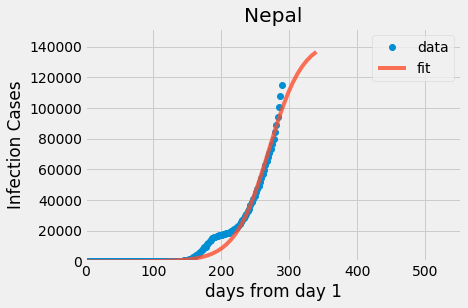

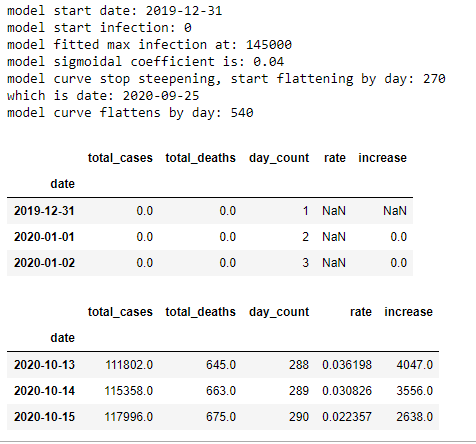

**Nepal,**

- The b coefficient is 270, which means that the model starts to flatten 270 days,
after 25th of September, and really flattern significantly after 540 days.

- The c coefficient is 145000, which is the predicted amount of infected people.

- The a coefficient is 0.04 is smaller than China's 0.22, which means the sigmoid is even softer in China. This means that Italy will take even longer than China to fight Covid-19.

From this, its seen that in Nepal if the graph goes like that:

max Active case: 145000,

curve stop steepening, start flattening by day: 270,

which is: 2020-09-25,

curve flattens by day: 540




# **Linear Regression and Random Forest for prediction:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Step-1:** Load dataset from - https://covid.ourworldindata.org/data/owid-covid-data.csv



In [ ]:
df = pd.read_csv('s3://sagemaker-studio-im065hy7nj/owid-covid-data.csv')
df.head()

In [ ]:
df.describe()

In [ ]:
df.info

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

**Step-2:** Subsetting only those rows that have "NPL" in the "location" column and plot y-axis total_cases over x-axis as day-count.



In [ ]:
df=df[df['location']=='Nepal']
df.head()
df.tail()

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

In [ ]:
cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million',
           'new_deaths_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
           'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
           'cardiovasc_death_rate', 'diabetes_prevalence', 'handwashing_facilities', 'hospital_beds_per_thousand',
           'life_expectancy', 'human_development_index'
          ]

**Step-3:** Univariate Analysis:

a. Draw histograms of each numerical variable 

b. Find mean, median and mode of each column 

In [ ]:
for i in cols:
  sns.distplot(df[i],kde=False,hist=True,bins=11,hist_kws=dict(edgecolor="k", linewidth=1))
  plt.title("Histogram")
  plt.ylabel("Frequency")
  plt.show()

In [ ]:
# Plotting Boxplots

for i in cols:
  sns.boxplot(y=i, data = df)
  #sns.boxplot(y=i, data = df)
  plt.title("Boxplot 11")
  plt.show()

In [ ]:
df.mean()

In [ ]:
df.mode()

In [ ]:
df.median()

**Bivariate Analysis:

a. Draw scatter plots of each numerical column versus one another 
b. Draw line plots of each numerical column versus one another

In [ ]:
# Plotting ScatterPlots

for i in cols:
    sns.scatterplot(x='total_cases', y=i, data=df)
    plt.title("Scatter Plot")
    plt.show()

In [ ]:
# Plotting Lineplots

for i in cols:
    sns.lineplot(x='total_cases',y=i,data=df)
    plt.title("Line Plots")
    plt.show()

**Step-5:** Handle Missing values:

a. If there are null values in numerical column, replace the null values by the mean of that column  
b. If there are null values in categorical column, replace the null values by the mode of that column 
c. If more than 50%the values in a column are null, then drop that entire column 

In [ ]:
# fill null value with mean value

df = df.fillna(df.mean())

In [ ]:
# Since 'tests_units' columns is null catagorical columns so we replace them with their mode

df['tests_units'].fillna(df['tests_units'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
# For datetime convert to ordinal(since we need float value)

import datetime as dt 
df["date"]=pd.to_datetime(df["date"]) 
df["date"]=df["date"].map(dt.datetime.toordinal)

In [ ]:
df.head()

Step-6: Drop all categorical columns and Select “total_cases” column as the target variable

In [ ]:
# Droping the categorical columns to prepare the dataset for training

df.drop(['iso_code', 'continent','location','tests_units'], axis=1, inplace=True)
df.head()

In [ ]:
# Create arrays for the features and the response variable
y = df["total_cases"].values
X = df.drop(["total_cases"],axis=1).values

***Next we will train the model using LinearRegression and RandomForestRegressor as mentioned in the project.***

In [ ]:
# Train and Test splitting of data 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create the regressor: reg
reg= LinearRegression(normalize=True, fit_intercept=True)

# Fit the regressor to the training data
reg.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred=reg.predict(X_test)



plt.plot(y_pred)


#Score the model
reg.score(X_test, y_test)

**Output: 0.9999999999982944**


From the LinearRegression classifier we get a accuracy score of 99.99% and that was quiet good for a model .For a buisness model a accuracy percentage of more than 80% is good . So the accuracy score is quiet good for these model.

In [ ]:
# Compute and print R^2 and RMSE

print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

**Output:**

    R^2: 0.9999999999982944
    Root Mean Squared Error: 0.35114644816412

In [ ]:
# RMS Error is too less... 0.01 only.

# Now for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor()
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# Predict on the test data: y_pred
y_pred=rf.predict(X_test)

#Score the model
rf.score(X_test,y_test)

Output: 

    0.91785465582245

Accuracy score for RandomForestRegressor is 99.92% which is quite good, although less than LinearRegression model which is 99.99%

In [ ]:
# Now we can predict using our data

reg.predict([[737714.0, 3556.0,3391.857, 675.0, 12.0, 13.857, 4049.723, 90.538, 116.411, 23.167, 0.412, 0.476, 14530.0, 1191514.0, 40.894, 0.499, 14755.0, 0.506, 4.934, 0.203, 76.85, 29136808.0, 204.43, 25.0, 5.809, 3.2119999999999997, 2442.804, 15.0, 260.797, 7.26, 9.5, 37.8, 47.782, 0.3, 70.78, 0.574]])

output: 
    
    array([118028.49372836])

Which is total cases predicted.

In [ ]:
rf.predict([[737714.0, 3556.0,3391.857, 675.0, 12.0, 13.857, 4049.723, 90.538, 116.411, 23.167, 0.412, 0.476, 14530.0, 1191514.0, 40.894, 0.499, 14755.0, 0.506, 4.934, 0.203, 76.85, 29136808.0, 204.43, 25.0, 5.809, 3.2119999999999997, 2442.804, 15.0, 260.797, 7.26, 9.5, 37.8, 47.782, 0.3, 70.78, 0.574]])

Output:

    array([117825.2568475])